# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

#Installing packages

In [ ]:
!pip install networkx==2.3


     |████████████████████████████████| 1.7 MB 11.6 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=e7f1f166ccb4e4b71e1eaf6ff13cb778a7b005abecd3777384f559545484817a
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.2
    Uninstalling networkx-2.6.2:
      Successfully uninstalled networkx-2.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install stellargraph

     |████████████████████████████████| 435 kB 11.8 MB/s 


#Reading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [ ]:
data.head()

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3


#Existing code

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]

In [ ]:
# edges

In [ ]:
B = nx.Graph() 
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie') 
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor') 
B.add_edges_from(edges, label='acted') 

In [ ]:
A = list(nx.connected_component_subgraphs(B))[0]

In [ ]:
# nx.draw_networkx(A,node_color='cyan') 
A.number_of_nodes() , B.number_of_nodes()

(4703, 4703)

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


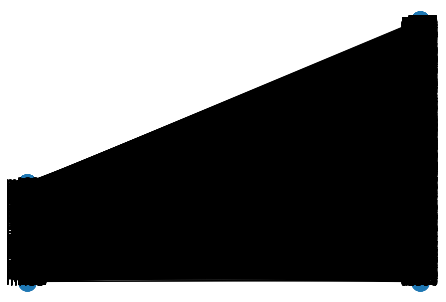

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
sub_graph1=nx.ego_graph(A,'m1094')#['a973',
#  'a967',
#  'a964',
#  'a1731',
#  'a970',
#  'a969',
#  'a1028',
#  'a965',
#  'a1003',
#  'a1057',
#  'm1094',
#  'm1100',
#  'a988',
#  'a959',
#  'm1111',
#  'a966',
#  'a49',
#  'a1037',
#  'm67'])


In [ ]:
sub_graph1.nodes()

NodeView(('a2720', 'a2399', 'a2779', 'a2750', 'a2777', 'a2762', 'a2760', 'a1122', 'a2810', 'a243', 'a2782', 'a2347', 'a2768', 'a2799', 'a2780', 'a1595', 'a2007', 'a2778', 'a2802', 'a139', 'a2809', 'a2715', 'a2759', 'a2781', 'a2785', 'a2790', 'a736', 'a2771', 'a2776', 'a2769', 'a2805', 'a316', 'a2806', 'a2797', 'a2796', 'a2761', 'a2772', 'a615', 'a2803', 'a2763', 'a2758', 'a2801', 'a431', 'a2807', 'a2791', 'a2786', 'a2795', 'a1550', 'a2755', 'a2811', 'a2804', 'a2764', 'a2765', 'a2784', 'a2794', 'a2793', 'a1686', 'a2800', 'a2783', 'a2770', 'a2775', 'a2808', 'a2767', 'a2766', 'a1993', 'a2792', 'a807', 'a2756', 'm1094', 'a2773', 'a2789', 'a2757', 'a2798', 'a2774', 'a1946', 'a483', 'a2787', 'a2788'))

In [ ]:
nx.draw_networkx(sub_graph1,node_color='red')

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
# walks[:2]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

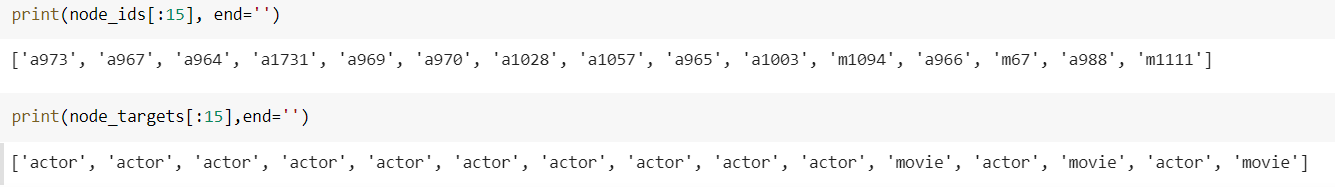

In [ ]:
# len(pd.Series(node_ids).unique())
# type(node_ids)

list

In [ ]:
# node_embeddings[:2]

#Data split

In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    for i,id in enumerate(node_ids):                                       #splitting into movie and actor nodes
        if 'm' in id:
            movie_nodes.append(id)
            movie_embeddings.append(node_embeddings[i])
        if 'a' in id:
            actor_nodes.append(id)
            actor_embeddings.append(node_embeddings[i])



    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [ ]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

In [ ]:
# len(actor_nodes), len(movie_nodes) , len(actor_embeddings),len(movie_embeddings)

(3411, 1292, 3411, 1292)

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

#Cost 1

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph

In [ ]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''

    # for 
    giant = max(nx.connected_component_subgraphs(graph), key=len)
    nnodes = graph.number_of_nodes()
    cost1=  (1/number_of_clusters) * (giant.number_of_nodes() / nnodes )                             # calculate cost1 
    
    return cost1

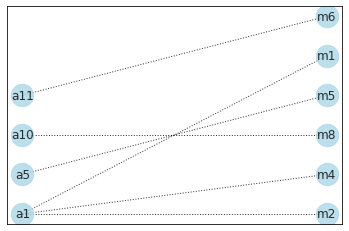

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [ ]:
giant = max(nx.connected_component_subgraphs(graded_graph), key=len)
# giant = sorted(nx.connected_component_subgraphs(graded_graph), key=len, reverse=True)[0]

In [ ]:
# a,b = bipartite.sets(graded_graph)                                            
nx.is_connected(graded_graph)

False

In [ ]:
# bottom_nodes, top_nodes = bipartite.sets(graded_graph)

In [ ]:
graded_graph.nodes['a1']

{'bipartite': 0}

In [ ]:
u = [n for n in graded_graph.nodes if graded_graph.nodes[n]['bipartite'] == 0] 
v =  [n for n in graded_graph.nodes if graded_graph.nodes[n]['bipartite'] == 1] 

In [ ]:
u,v

(['a1', 'a5', 'a10', 'a11'], ['m1', 'm2', 'm4', 'm6', 'm5', 'm8'])

In [ ]:
giant.number_of_nodes()

4

<font color='cyan'>Grader function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

#Cost 2

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    sum_degrees = 0
   
    # for i in range(len(number_of_clusters)):
    # u = [n for n in graph.nodes if graph.nodes[n]['bipartite'] == 0]
    u = [n for n in graph.nodes if 'a' in n]
    for j in u: 
        sum_degrees += graph.degree(j)
    # v = [n for n in graph.nodes if graph.nodes[n]['bipartite'] == 1] 
    v = [n for n in graph.nodes if 'm' in  n]
    cost2=  (1/number_of_clusters) * (sum_degrees / len(v))                                                                     

    
    return cost2 

<font color='cyan'>Grader function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

In [ ]:
# np.where(number_of_clusters == max(number_of_clusters))

<font color='blue'>Grouping similar actors</font>

In [ ]:
np.asarray(actor_embeddings).shape

(3411, 128)

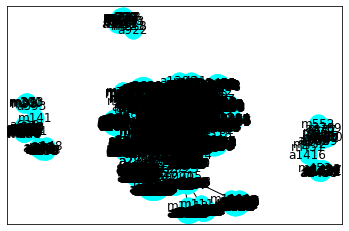

In [ ]:
nx.draw_networkx(G[1],node_color='cyan')

In [ ]:
# c2 = np.where(model.labels_ == 2)

In [ ]:
# c2[0]

array([  26,   30,   58, ..., 3408, 3409, 3410])

In [ ]:
# type(c2[0].flatten())

numpy.ndarray

In [ ]:
# node_ids[:26]
# actor

#Actor Cluster

In [ ]:
number_of_clusters = np.asarray([3, 5, 10, 30, 50, 100, 200, 500])

In [ ]:
# def best_k():
# pts = []
cost = []
for i in number_of_clusters:
    c1 = 0
    c2 = 0
    G = []
    for _ in range(i):
        G.append(nx.Graph())

    algo = KMeans(n_clusters=i,n_jobs=-1)
    algo.fit(np.asarray(actor_embeddings))

    for j,k in enumerate(algo.labels_):

        sub_graph = nx.ego_graph(A,actor_nodes[j])  #node_ids[j])
        G[k].add_nodes_from(sub_graph.nodes) # adding nodes 
        G[k].add_edges_from(sub_graph.edges()) # adding edges
    
    for n in range(i):
    # for g,n in enumerate(range(i)):
        c1 += cost1(G[n],i)
        c2 += cost2(G[n],i)
    c = c1*c2
    cost.append(c)
    print(cost)

ind = np.array(cost).argmax()
# return number_of_clusters[ind]

best_k = number_of_clusters[ind]
# best_k = best_k()

    


[3.7460205962899065]
[3.7460205962899065, 2.883683694078539]
[3.7460205962899065, 2.883683694078539, 2.2770724063233474]
[3.7460205962899065, 2.883683694078539, 2.2770724063233474, 1.7081531475806617]
[3.7460205962899065, 2.883683694078539, 2.2770724063233474, 1.7081531475806617, 1.5494852040814588]
[3.7460205962899065, 2.883683694078539, 2.2770724063233474, 1.7081531475806617, 1.5494852040814588, 1.5791660557148204]
[3.7460205962899065, 2.883683694078539, 2.2770724063233474, 1.7081531475806617, 1.5494852040814588, 1.5791660557148204, 1.6917664460159874]
[3.7460205962899065, 2.883683694078539, 2.2770724063233474, 1.7081531475806617, 1.5494852040814588, 1.5791660557148204, 1.6917664460159874, 1.869127761894161]


In [ ]:
best_k

3

In [ ]:
# cost

<font color='blue'>Displaying similar actor clusters</font>

In [ ]:
model = KMeans(n_clusters=3,n_jobs=-1)
model.fit(np.asarray(actor_embeddings))



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# G = []
# for i in range(3):
#     G.append(nx.Graph())

In [ ]:
# len(model.labels_)

3411

In [ ]:
# actor_nodes

In [ ]:

# for j,k in enumerate(model.labels_):

#     sub_graph = nx.ego_graph(A,actor_nodes[j])
#     G[k].add_nodes_from(sub_graph.nodes) # adding nodes 
#     G[k].add_edges_from(sub_graph.edges()) # adding edges 

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
actor_embeddings_2d.shape

(3411, 2)

In [ ]:
type(model.labels_)

numpy.ndarray

##Creating a dataframe witl cluster labels

In [ ]:
data_2d_actor = np.c_[actor_embeddings_2d,np.array(model.labels_)]

In [ ]:
df = pd.DataFrame(data_2d_actor,columns=['data_1','data_2','label'])

In [ ]:
df.head()

,data_1,data_2,label
0,-36.050217,-58.278637,0.0
1,-31.376343,-62.574486,0.0
2,-35.651272,-58.440044,0.0
3,0.380096,-62.656887,0.0
4,-35.671654,-60.525463,0.0


##Visualization 

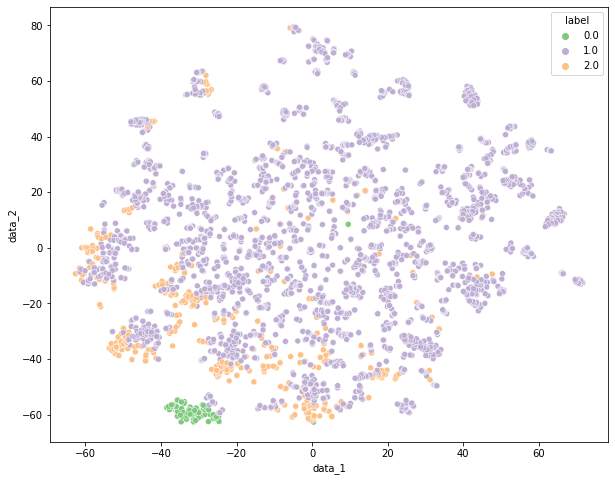

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(df['data_1'],df['data_2'],hue=df['label'],palette='Accent')
plt.title('Actor cluster image')

#Movie Cluster

<font color='blue'>Grouping similar movies</font>

In [ ]:
number_of_clusters = np.asarray([3, 5, 10, 30, 50, 100, 200, 500])

In [ ]:
# def best_k():
# pts = []
cost = []
for i in number_of_clusters:
    c1 = 0
    c2 = 0
    G = []
    for _ in range(i):
        G.append(nx.Graph())

    algo = KMeans(n_clusters=i,n_jobs=-1)
    algo.fit(np.asarray(movie_embeddings))

    for j,k in enumerate(algo.labels_):

        sub_graph = nx.ego_graph(A,movie_nodes[j])
        G[k].add_nodes_from(sub_graph.nodes) # adding nodes 
        G[k].add_edges_from(sub_graph.edges()) # adding edges
    
    for n in range(i):
    # for g,n in enumerate(range(i)):
        c1 += cost1(G[n],i)
        c2 += cost2(G[n],i)
    c = c1*c2
    cost.append(c)
    print(cost)

ind = np.array(cost).argmax()
# return number_of_clusters[ind]

best_k = number_of_clusters[ind]

[8.420970413680921]
[8.420970413680921, 8.8318062340383]
[8.420970413680921, 8.8318062340383, 9.10747549875303]
[8.420970413680921, 8.8318062340383, 9.10747549875303, 11.342388743509739]
[8.420970413680921, 8.8318062340383, 9.10747549875303, 11.342388743509739, 14.571012479346322]
[8.420970413680921, 8.8318062340383, 9.10747549875303, 11.342388743509739, 14.571012479346322, 13.84728115432558]
[8.420970413680921, 8.8318062340383, 9.10747549875303, 11.342388743509739, 14.571012479346322, 13.84728115432558, 12.508944648661483]
[8.420970413680921, 8.8318062340383, 9.10747549875303, 11.342388743509739, 14.571012479346322, 13.84728115432558, 12.508944648661483, 10.311183004874193]


In [ ]:
best_k

50

In [ ]:
model = KMeans(n_clusters=best_k,n_jobs=-1)
model.fit(np.asarray(movie_embeddings))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
G = []
for i in range(best_k):
    G.append(nx.Graph())

for j,k in enumerate(model.labels_):

    sub_graph = nx.ego_graph(A,movie_nodes[j])
    G[k].add_nodes_from(sub_graph.nodes) # adding nodes 
    G[k].add_edges_from(sub_graph.edges()) # adding edges 

In [ ]:
movie_embeddings_2d = trans.fit_transform(movie_embeddings)

In [ ]:
data_2d_movie = np.c_[movie_embeddings_2d,np.array(model.labels_)]

In [ ]:
df_movie = pd.DataFrame(data_2d_movie,columns=['data_1','data_2','movie_label'])

##Visualization

<font color='blue'>Displaying similar movie clusters</font>

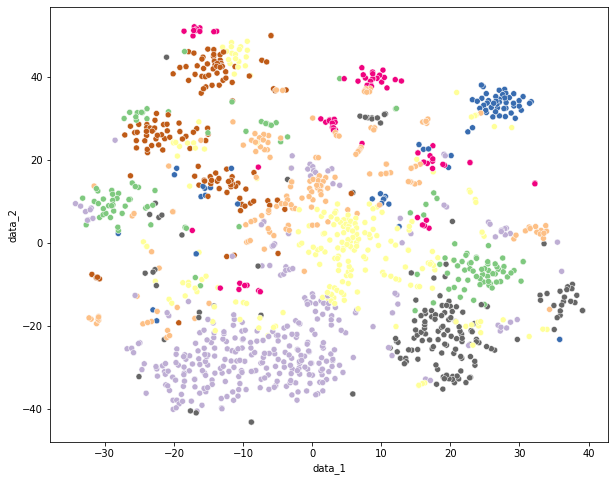

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot('data_1','data_2',data = df_movie,hue='movie_label',palette= 'Accent',legend=False)
plt.title('Movie Cluster image')

In [ ]:
df_movie['movie_label'].nunique()

50

As 50 was the best cluster, the data is clustered in 50 colours. The legend list was too long, hence removed.